In [1]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import ipywidgets as widgets

In [2]:
def stock_simulator(starting_price,periods,mean,std):
    X_axis = []
    Y_axis = []
    
    current_period = 1
    previous_price = starting_price
    
    while current_period <= periods:
        
        drift = float(mean)/periods
        shock = np.random.normal(loc=drift,scale=float(std)/np.sqrt(periods))
        
        current_price = previous_price + previous_price*(drift + shock)
        previous_price = current_price
        
        X_axis.append(current_period)
        Y_axis.append(current_price)
        
        current_period = current_period + 1
    
    plt.subplot(121)
    plt.plot(X_axis,Y_axis)
    return Y_axis[-1]

In [3]:
Var = []
opt={"AAPL":'Apple' , "GOOGL":'Google' , "MSFT": 'Microsoft'}
weights = []

In [4]:
def simulator(stock, weight, investment):
    if weight in weights:
        print "choice" + str(100 * weight) + '%'
        return
 
    data = quandl.get("WIKI/"+stock, authtoken="Qubb5yEdKn7DFsKodSXR")
    
    
    starting_price = data["Open"][-1]
    periods = 365
    mean = data["Open"].pct_change().dropna().mean()
    std = data["Open"].pct_change().dropna().std()
    
    simulations = 0
    outcomes = []
    while simulations < 1000:
        outcomes.append(stock_simulator(starting_price,periods,mean,std))
        simulations += 1

    plt.ylabel('Return')
    plt.xlabel('Days')
    plt.subplot(122)
    sns.distplot(outcomes,bins=50,color="green",vertical=True)
    
   
    q = np.percentile(outcomes,1)
    
    plt.axhline(q, color="yellow", linestyle="--")
    
    
    VaR_coef = (starting_price - q)/starting_price
    VaR = VaR_coef * investment * weight
    print("The maximum loss can be" +" "+ str(VaR))
    Var.append(VaR) 
    weights.append(weight)

In [5]:
stock_inputs_1 = widgets.Dropdown(
    options={'Apple': "AAPL", 'Google': "GOOGL", 'Microsoft': "MSFT"},
    value="GOOGL",
    description='Stock 1:',
)

stock_inputs_2 = widgets.Dropdown(
    options={'Apple': "AAPL", 'Google': "GOOGL", 'Microsoft': "MSFT"},
    value="GOOGL",
    description='Stock 2:',
)

stock_inputs_3 = widgets.Dropdown(
    options={'Apple': "AAPL", 'Google': "GOOGL", 'Microsoft': "MSFT"},
    value="GOOGL",
    description='Stock 3:',
)

weight_input = widgets.Dropdown(
    options = {'20%' : 0.2, '30%': 0.3, '50%':0.5},
    value=0.2,
    description='Weight:',
)


investment_input = widgets.IntSlider(
    value=5000,
    min=1000, max=10000, step=200,
    description='Budget:',
)

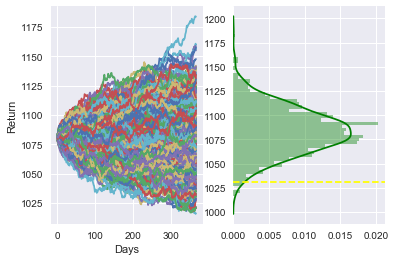

In [6]:
interactive_plot = widgets.interact_manual(simulator,stock=stock_inputs_1,weight=weight_input,investment=investment_input)

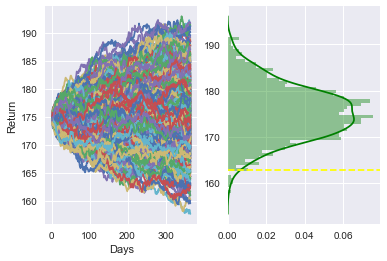

In [7]:
interactive_plot = widgets.interact_manual(simulator,stock=stock_inputs_2,weight=weight_input,investment=investment_input)

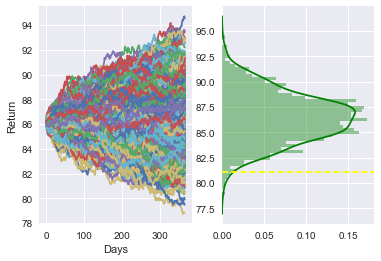

In [8]:
interactive_plot = widgets.interact_manual(simulator,stock=stock_inputs_3,weight=weight_input,investment=investment_input)

In [10]:
result = Var[0] + Var[1] + Var[2]
print "The maximum loss can be" + str(result)

The maximum loss can be296.760320803
